# Exploratory Data Analysis: Poverty Data

This notebook loads the SWS poverty datasets and explores trends and distributions using various visualizations.

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib as mpl

plt.style.use('seaborn-v0_8')

# Color settings
colors = ["#648FFF", "#785EF0", "#A11C5D", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r', 12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)
color_bg = "#1B181C"
color_text = "#FFFFFF"

# Plot Settings
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text
mpl.rcParams['axes.edgecolor'] = color_text

## Load Data

In [4]:
# Load the datasets
df_graph = pd.read_csv('../dataset/CS132_DataSheet-graph_data.csv')
df_area = pd.read_csv('../dataset/CS132_DataSheet-by-area.csv')

# Preview the main dataset
df_graph.head()

,Year,Month,Poor,Borderline,Not Poor,Total Respondents Percentage,Total Respondents Base,Poor Respondent Count,Borderline Respondent Count,Not Poor Respondent Count,Month Only
0,1985.0,1985-July,74,13,13,100,1200,888,156,156,7
1,1986.0,1986-May,66,16,18,100,1200,792,192,216,5
2,NaN,1986-October,67,13,20,100,1200,804,156,240,10
3,1987.0,1987-March,43,40,17,100,1200,516,480,204,3
4,NaN,1987-October,50,41,9,100,1200,600,492,108,10


## Data Cleaning and Preparation

In [5]:
# Convert 'Year' and 'Month' columns to datetime for easier plotting
df_graph['Month'] = pd.to_datetime(df_graph['Month'], errors='coerce')

# Check for missing values
df_graph.isnull().sum()

C:\Users\Vinz\AppData\Local\Temp\ipykernel_27800\1541063486.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_graph['Month'] = pd.to_datetime(df_graph['Month'], errors='coerce')


Year                            106
Month                             0
Poor                              0
Borderline                        0
Not Poor                          0
Total Respondents Percentage      0
Total Respondents Base            0
Poor Respondent Count             0
Borderline Respondent Count       0
Not Poor Respondent Count         0
Month Only                        0
dtype: int64

In [6]:
# Fill missing 'Year' values using the 'Month' column
df_graph['Year'] = df_graph['Month'].dt.year

# Preview cleaned data
df_graph.head()

,Year,Month,Poor,Borderline,Not Poor,Total Respondents Percentage,Total Respondents Base,Poor Respondent Count,Borderline Respondent Count,Not Poor Respondent Count,Month Only
0,1985,1985-07-01,74,13,13,100,1200,888,156,156,7
1,1986,1986-05-01,66,16,18,100,1200,792,192,216,5
2,1986,1986-10-01,67,13,20,100,1200,804,156,240,10
3,1987,1987-03-01,43,40,17,100,1200,516,480,204,3
4,1987,1987-10-01,50,41,9,100,1200,600,492,108,10


## Distribution of Poverty Status

The following histogram shows the distribution of the percentage of respondents who self-rated as Poor, Borderline, or Not Poor across all survey periods.

**Analysis:**

- The 'Poor' category is generally centered at higher percentages, indicating that a large portion of respondents consistently self-identified as poor over the years.
- The 'Borderline' group shows a moderate spread, suggesting a significant segment of the population is vulnerable and may shift between poor and not poor depending on circumstances.
- The 'Not Poor' group is skewed toward lower percentages, reflecting that only a minority of respondents consistently rated themselves as not poor.

**Implications:**

- The persistent high values for 'Poor' highlight the chronic nature of self-rated poverty in the Philippines.
- The presence of a substantial 'Borderline' group suggests that many households are at risk of falling into poverty during economic shocks.
- The relatively low and stable 'Not Poor' percentages indicate slow progress in moving people out of poverty.

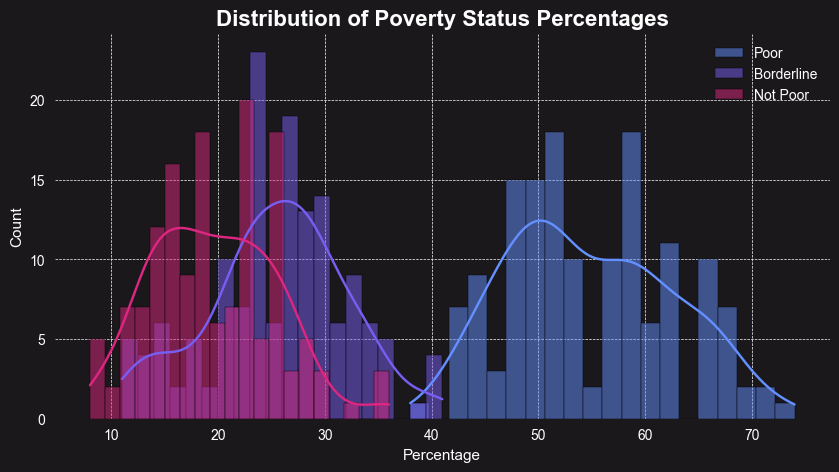

In [24]:
# Distribution of each status
plt.figure(figsize=(10,5))
sns.histplot(df_graph['Poor'], kde=True, color="#648FFF", label='Poor', bins=20)
sns.histplot(df_graph['Borderline'], kde=True, color="#785EF0", label='Borderline', bins=20)
sns.histplot(df_graph['Not Poor'], kde=True, color="#DC267F", label='Not Poor', bins=20)
plt.xlabel('Percentage')
plt.title('Distribution of Poverty Status Percentages', fontdict={'fontsize': 16, 'color': color_text, 'weight': 'bold'})
plt.legend()
plt.grid(visible=True, color=color_text, linestyle='--', linewidth=0.5)
plt.savefig('../plot_results/distribution_poverty_status.png', dpi=300, bbox_inches='tight')
plt.show()



## Stacked Area Plot: All Statuses Over Time

This stacked area plot visualizes the changes in the proportion of respondents in each poverty status over time.

**Analysis:**

- The 'Poor' category dominates the early years, with a gradual decline visible after the 2000s.
- The 'Borderline' group fluctuates but remains a significant portion, especially during periods of economic instability.
- The 'Not Poor' group shows a slow but steady increase, particularly in the last decade.

**Implications:**

- The long-term downward trend in self-rated poverty is positive but slow, indicating that economic growth has not rapidly translated into improved self-perceptions of well-being.
- The resilience of the 'Borderline' group suggests that many Filipinos remain economically insecure.
- The increase in the 'Not Poor' group is encouraging, but its pace highlights the need for more inclusive growth and targeted poverty reduction policies.

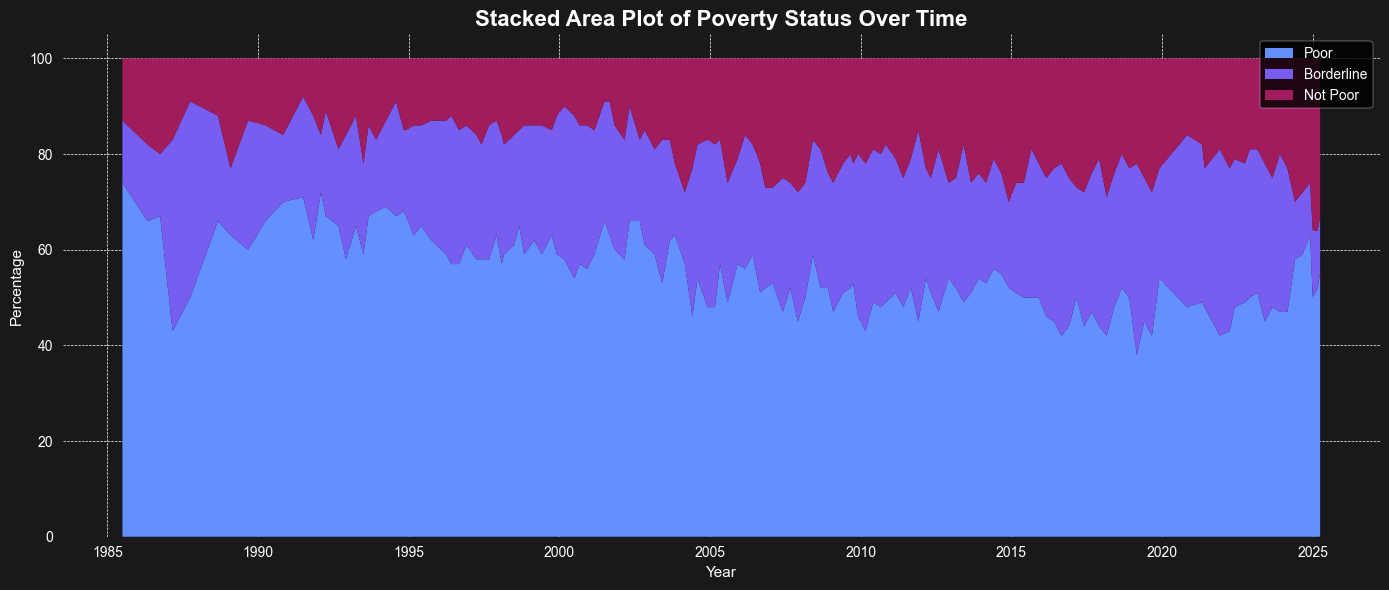

In [27]:
# Stacked area plot for all statuses
plt.figure(figsize=(14,6))
plt.stackplot(df_graph['Month'],
              df_graph['Poor'],
              df_graph['Borderline'],
              df_graph['Not Poor'],
              labels=['Poor', 'Borderline', 'Not Poor'],
              colors=[colors[0], colors[1], colors[2]],)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Stacked Area Plot of Poverty Status Over Time', fontdict={'fontsize': 16, 'color': color_text, 'weight': 'bold'})
plt.grid(visible=True, color=color_text, linestyle='--', linewidth=0.5)
plt.legend(loc='upper right', frameon=True, facecolor='#000000', edgecolor='#FFFFFF')
plt.tight_layout()
plt.savefig('../plot_results/stacked_area_plot.png', dpi=300, bbox_inches='tight')
plt.show()


## Summary Statistics

In [9]:
# Summary statistics for the main dataset
df_graph[['Poor', 'Borderline', 'Not Poor']].describe()

,Poor,Borderline,Not Poor
count,147.000000,147.000000,147.000000
mean,54.863946,25.496599,19.639456
std,7.730601,6.536907,5.828538
min,38.000000,11.000000,8.000000
25%,49.000000,22.000000,15.000000
50%,54.000000,26.000000,19.000000
75%,60.500000,29.500000,24.000000
max,74.000000,41.000000,36.000000


## Data Explanation

This notebook uses two main datasets from the Social Weather Stations (SWS) self-rated poverty surveys:

**1. CS132_DataSheet-graph_data.csv**

- **Purpose:** Contains national-level quarterly survey results from 1985 to 2025.
- **Key columns:**
  - `Year`, `Month`: Time of survey.
  - `Poor`, `Borderline`, `Not Poor`: Percentage of respondents in each self-rated poverty category.
  - `Total Respondents Base`: Number of survey respondents.
  - `Poor Respondent Count`, `Borderline Respondent Count`, `Not Poor Respondent Count`: Raw counts for each group.

**2. CS132_DataSheet-by-area.csv**

- **Purpose:** Contains area-level survey results (Metro Manila, Balance Luzon, Visayas, Mindanao) for each quarter.
- **Key columns:**
  - `Date formatted`: Date of survey.
  - `Poor`, `Borderline`, `Not Poor`: Percentage of respondents in each category for the area.
  - `Area`: Geographic area.
  - `Survey Population`: Number of respondents per area.
  - `Raw Count Poor`, `Raw Count Borderline`, `Raw Count Not Poor`: Raw counts for each group.

Both datasets allow for analysis of trends, distributions, and regional differences in self-rated poverty over time.

In [10]:
# Shape and columns
print('df_graph shape:', df_graph.shape)
print('df_graph columns:', df_graph.columns.tolist())
print('df_area shape:', df_area.shape)
print('df_area columns:', df_area.columns.tolist())

df_graph shape: (147, 11)
df_graph columns: ['Year', 'Month', 'Poor', 'Borderline', 'Not Poor', 'Total Respondents Percentage', 'Total Respondents Base', 'Poor Respondent Count', 'Borderline Respondent Count', 'Not Poor Respondent Count', 'Month Only']
df_area shape: (80, 12)
df_area columns: ['Sum', 'Date', 'Date formatted', 'Poor ', 'Borderline', 'Not Poor', 'Survey Population', 'Raw Count Poor', 'Raw Count Borderline', 'Raw Count Not Poor', 'Area', 'Month Only']


In [11]:
# Data types and non-null counts
print('df_graph info:')
df_graph.info()
print('\ndf_area info:')
df_area.info()

df_graph info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Year                          147 non-null    int32         
 1   Month                         147 non-null    datetime64[ns]
 2   Poor                          147 non-null    int64         
 3   Borderline                    147 non-null    int64         
 4   Not Poor                      147 non-null    int64         
 5   Total Respondents Percentage  147 non-null    int64         
 6   Total Respondents Base        147 non-null    int64         
 7   Poor Respondent Count         147 non-null    int64         
 8   Borderline Respondent Count   147 non-null    int64         
 9   Not Poor Respondent Count     147 non-null    int64         
 10  Month Only                    147 non-null    int64         
dtypes: datetime64[ns]

In [12]:
# Show first few rows of each dataset
print('df_graph sample:')
display(df_graph.head())
print('df_area sample:')
display(df_area.head())

df_graph sample:


,Year,Month,Poor,Borderline,Not Poor,Total Respondents Percentage,Total Respondents Base,Poor Respondent Count,Borderline Respondent Count,Not Poor Respondent Count,Month Only
0,1985,1985-07-01,74,13,13,100,1200,888,156,156,7
1,1986,1986-05-01,66,16,18,100,1200,792,192,216,5
2,1986,1986-10-01,67,13,20,100,1200,804,156,240,10
3,1987,1987-03-01,43,40,17,100,1200,516,480,204,3
4,1987,1987-10-01,50,41,9,100,1200,600,492,108,10


df_area sample:


,Sum,Date,Date formatted,Poor,Borderline,Not Poor,Survey Population,Raw Count Poor,Raw Count Borderline,Raw Count Not Poor,Area,Month Only
0,100,5/1/2021,2021-05-01,59,35,6,300,177,105,18,Mindanao,5
1,100,5/1/2021,2021-05-01,56,39,5,300,168,117,15,Visayas,5
2,100,5/1/2021,2021-05-01,45,31,24,300,135,93,72,Balance Luzon,5
3,100,5/1/2021,2021-05-01,39,31,30,300,117,93,90,Metro Manila,5
4,100,6/1/2021,2021-06-01,51,42,7,300,153,126,21,Mindanao,6


In [13]:
# Summary statistics for numeric columns
print('df_graph describe:')
display(df_graph.describe())
print('df_area describe:')
display(df_area.describe())

df_graph describe:


,Year,Month,Poor,Borderline,Not Poor,Total Respondents Percentage,Total Respondents Base,Poor Respondent Count,Borderline Respondent Count,Not Poor Respondent Count,Month Only
count,147.000000,147,147.000000,147.000000,147.000000,147.0,147.0,147.000000,147.000000,147.000000,147.000000
mean,2006.544218,2007-01-27 11:35:30.612244992,54.863946,25.496599,19.639456,100.0,1200.0,658.367347,305.959184,235.673469,7.360544
min,1985.000000,1985-07-01 00:00:00,38.000000,11.000000,8.000000,100.0,1200.0,456.000000,132.000000,96.000000,1.000000
25%,1998.000000,1998-02-15 00:00:00,49.000000,22.000000,15.000000,100.0,1200.0,588.000000,264.000000,180.000000,4.000000
50%,2007.000000,2007-02-01 00:00:00,54.000000,26.000000,19.000000,100.0,1200.0,648.000000,312.000000,228.000000,7.000000
75%,2015.500000,2016-01-15 12:00:00,60.500000,29.500000,24.000000,100.0,1200.0,726.000000,354.000000,288.000000,10.000000
max,2025.000000,2025-04-01 00:00:00,74.000000,41.000000,36.000000,100.0,1200.0,888.000000,492.000000,432.000000,12.000000
std,10.856619,NaN,7.730601,6.536907,5.828538,0.0,0.0,92.767206,78.442884,69.942458,3.369780


df_area describe:


,Sum,Poor,Borderline,Not Poor,Survey Population,Raw Count Poor,Raw Count Borderline,Raw Count Not Poor,Month Only
count,80.000000,80.000000,80.000000,80.000000,80.0,80.000000,80.000000,80.00000,80.000000
mean,100.012500,51.187500,25.000000,23.825000,300.0,153.562500,75.000000,71.47500,6.700000
std,0.111803,12.309401,10.633122,13.656523,0.0,36.928204,31.899367,40.96957,3.587602
min,100.000000,25.000000,8.000000,4.000000,300.0,75.000000,24.000000,12.00000,1.000000
25%,100.000000,40.000000,13.750000,9.750000,300.0,120.000000,41.250000,29.25000,3.750000
50%,100.000000,52.000000,27.000000,23.500000,300.0,156.000000,81.000000,70.50000,6.000000
75%,100.000000,61.000000,33.000000,34.500000,300.0,183.000000,99.000000,103.50000,9.250000
max,101.000000,76.000000,48.000000,48.000000,300.0,228.000000,144.000000,144.00000,12.000000


In [14]:
# Value ranges and uniqueness
print('df_graph Poor min/max:', df_graph['Poor'].min(), df_graph['Poor'].max())
print('df_graph Borderline min/max:', df_graph['Borderline'].min(), df_graph['Borderline'].max())
print('df_graph Not Poor min/max:', df_graph['Not Poor'].min(), df_graph['Not Poor'].max())
print('df_graph unique years:', sorted(df_graph['Year'].dropna().unique()))
print('df_area unique areas:', df_area['Area'].unique())

df_graph Poor min/max: 38 74
df_graph Borderline min/max: 11 41
df_graph Not Poor min/max: 8 36
df_graph unique years: [np.int32(1985), np.int32(1986), np.int32(1987), np.int32(1988), np.int32(1989), np.int32(1990), np.int32(1991), np.int32(1992), np.int32(1993), np.int32(1994), np.int32(1995), np.int32(1996), np.int32(1997), np.int32(1998), np.int32(1999), np.int32(2000), np.int32(2001), np.int32(2002), np.int32(2003), np.int32(2004), np.int32(2005), np.int32(2006), np.int32(2007), np.int32(2008), np.int32(2009), np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024), np.int32(2025)]
df_area unique areas: ['Mindanao' 'Visayas' 'Balance Luzon' 'Metro Manila']


Correlation matrix:


,Poor,Borderline,Not Poor
Poor,1.000000,-0.677971,-0.565968
Borderline,-0.677971,1.000000,-0.222317
Not Poor,-0.565968,-0.222317,1.000000


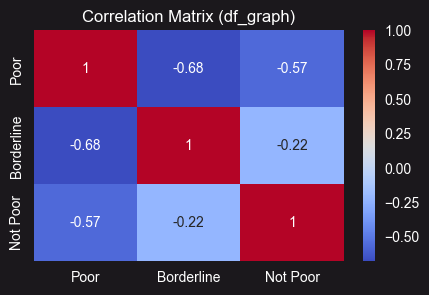

In [15]:
# Correlation matrix
corr = df_graph[['Poor', 'Borderline', 'Not Poor']].corr()
print('Correlation matrix:')
display(corr)
plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (df_graph)')
plt.show()

Missing values in df_graph:
Year                            0
Month                           0
Poor                            0
Borderline                      0
Not Poor                        0
Total Respondents Percentage    0
Total Respondents Base          0
Poor Respondent Count           0
Borderline Respondent Count     0
Not Poor Respondent Count       0
Month Only                      0
dtype: int64

Missing values in df_area:
Sum                     0
Date                    0
Date formatted          0
Poor                    0
Borderline              0
Not Poor                0
Survey Population       0
Raw Count Poor          0
Raw Count Borderline    0
Raw Count Not Poor      0
Area                    0
Month Only              0
dtype: int64


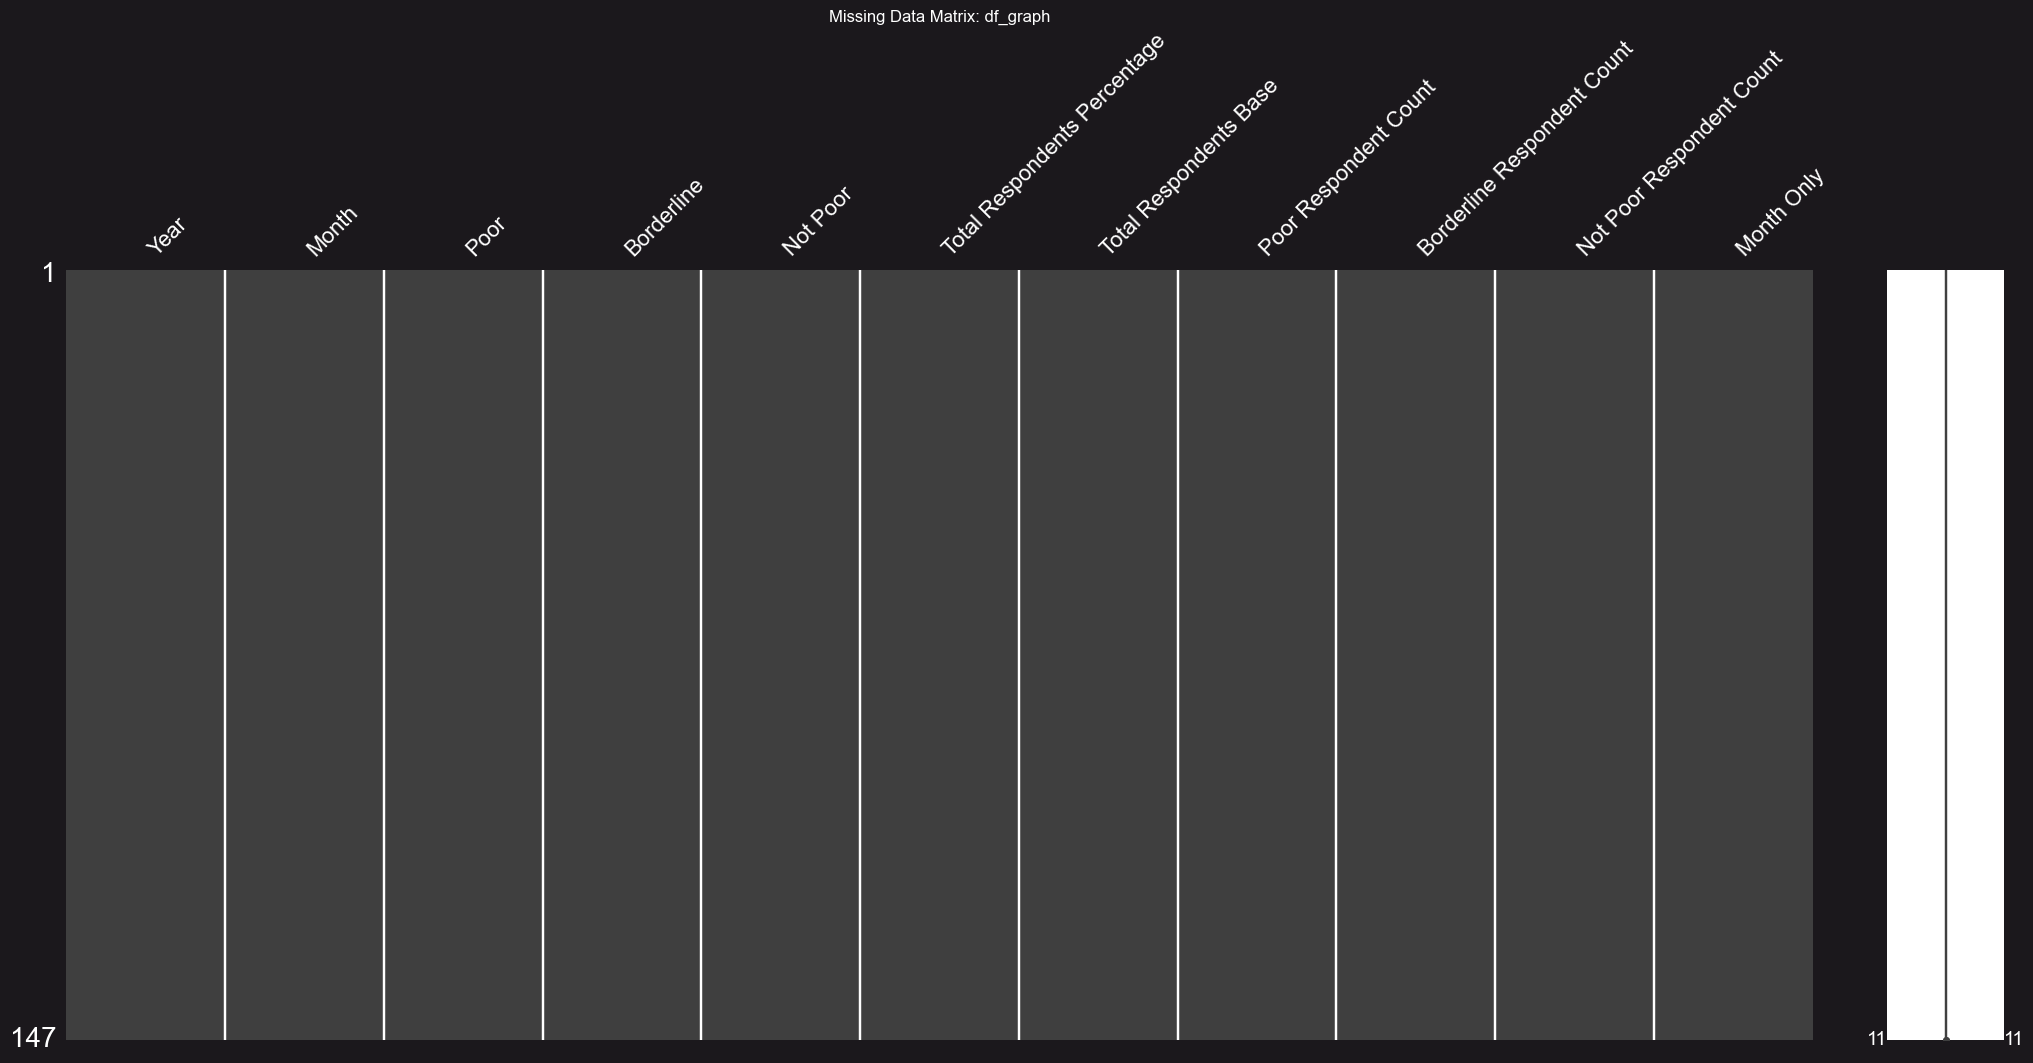

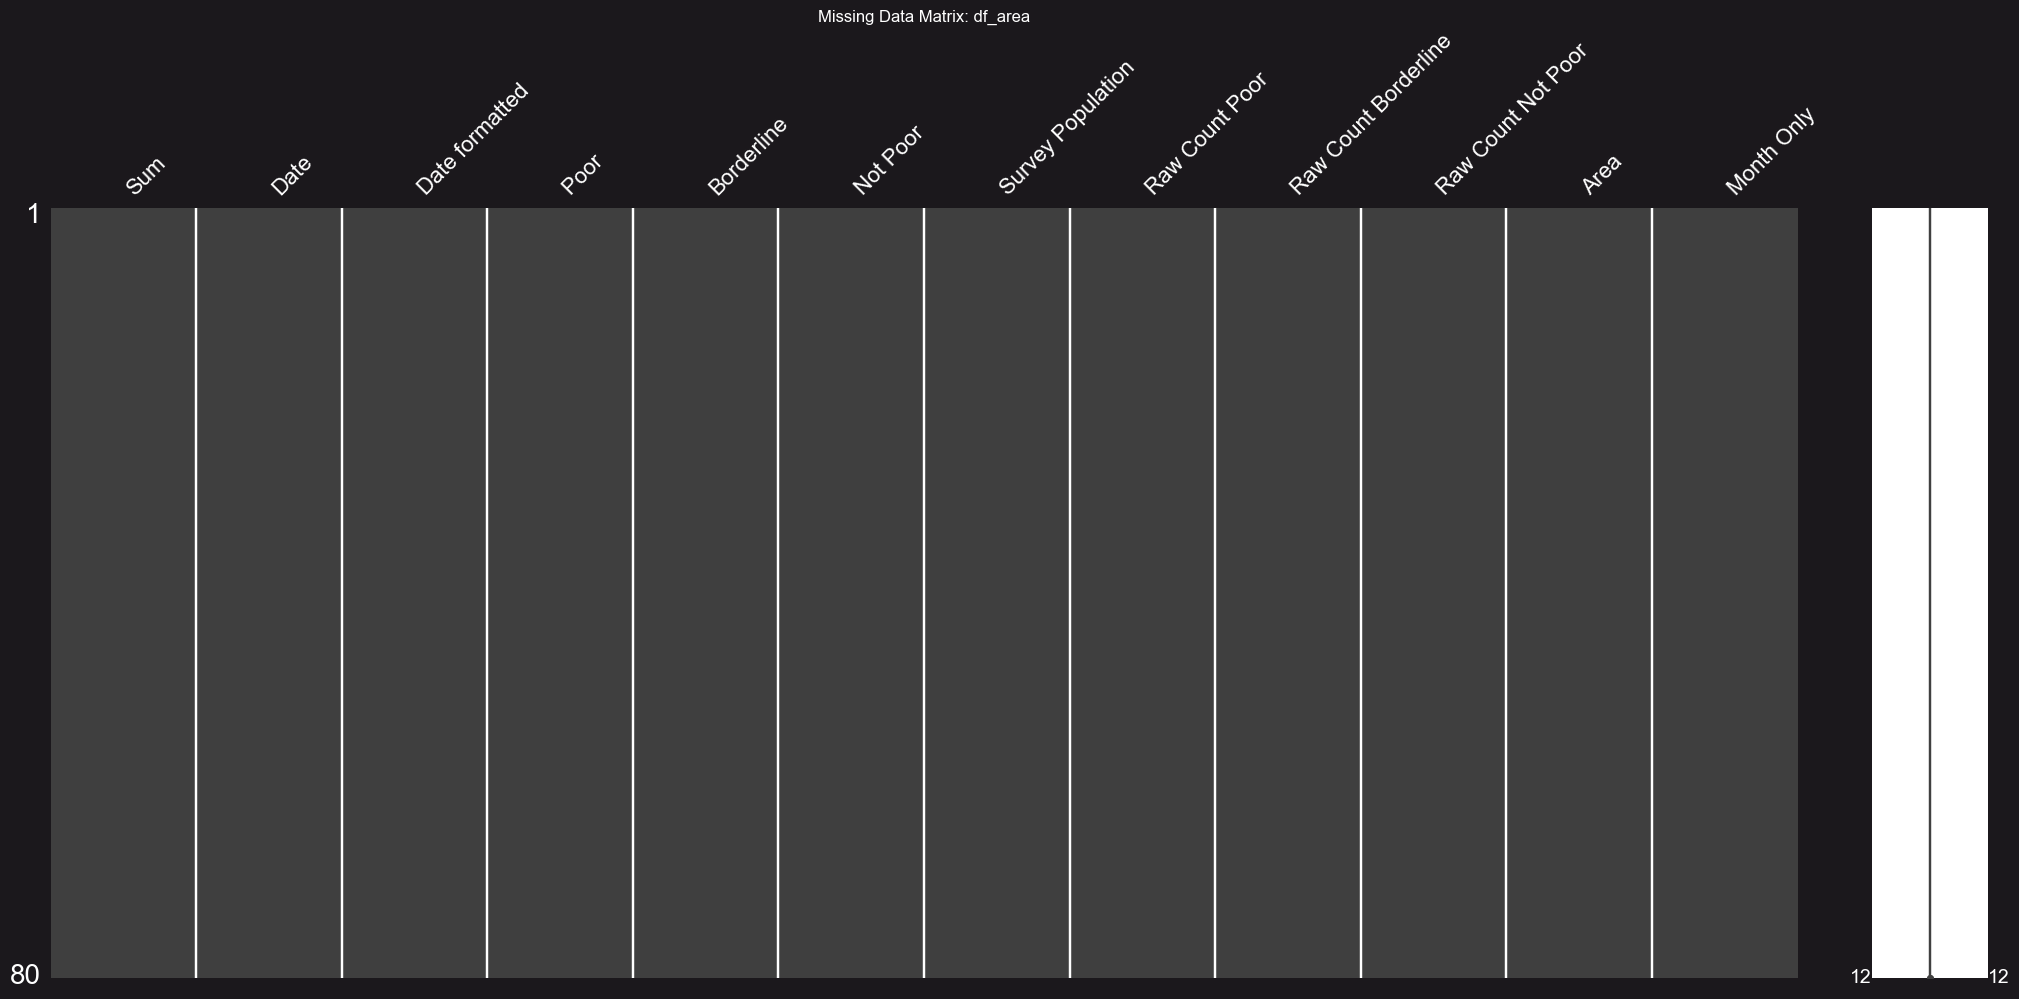

In [16]:
# Missing value patterns

print('Missing values in df_graph:')
print(df_graph.isnull().sum())
print('\nMissing values in df_area:')
print(df_area.isnull().sum())
msno.matrix(df_graph)
plt.title('Missing Data Matrix: df_graph')
plt.show()
msno.matrix(df_area)
plt.title('Missing Data Matrix: df_area')
plt.show()

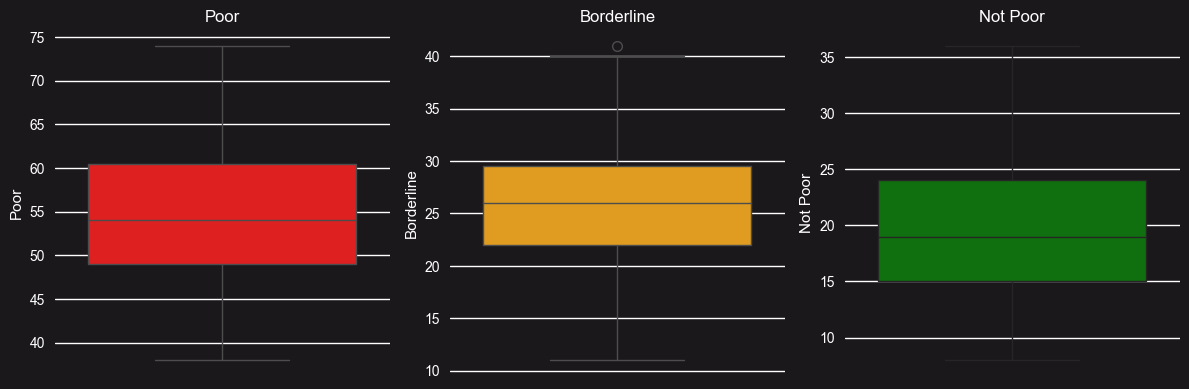

In [17]:
# Outlier detection with boxplots
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(y=df_graph['Poor'], color='red')
plt.title('Poor')
plt.subplot(1,3,2)
sns.boxplot(y=df_graph['Borderline'], color='orange')
plt.title('Borderline')
plt.subplot(1,3,3)
sns.boxplot(y=df_graph['Not Poor'], color='green')
plt.title('Not Poor')
plt.tight_layout()
plt.show()

In [18]:
# Temporal coverage and record counts per year/month
print('df_graph first date:', df_graph['Month'].min())
print('df_graph last date:', df_graph['Month'].max())
print('df_area first date:', df_area['Date formatted'].min())
print('df_area last date:', df_area['Date formatted'].max())
print('\nRecords per year (df_graph):')
print(df_graph['Year'].value_counts().sort_index())
print('\nRecords per area (df_area):')
print(df_area['Area'].value_counts())

df_graph first date: 1985-07-01 00:00:00
df_graph last date: 2025-04-01 00:00:00
df_area first date: 2021-05-01
df_area last date: 2025-04-01

Records per year (df_graph):
Year
1985    1
1986    2
1987    2
1988    1
1989    2
1990    2
1991    2
1992    4
1993    4
1994    4
1995    4
1996    4
1997    4
1998    5
1999    4
2000    4
2001    4
2002    4
2003    4
2004    4
2005    4
2006    4
2007    4
2008    4
2009    5
2010    4
2011    4
2012    4
2013    4
2014    4
2015    4
2016    4
2017    4
2018    4
2019    4
2020    1
2021    4
2022    4
2023    4
2024    4
2025    4
Name: count, dtype: int64

Records per area (df_area):
Area
Mindanao         20
Visayas          20
Balance Luzon    20
Metro Manila     20
Name: count, dtype: int64


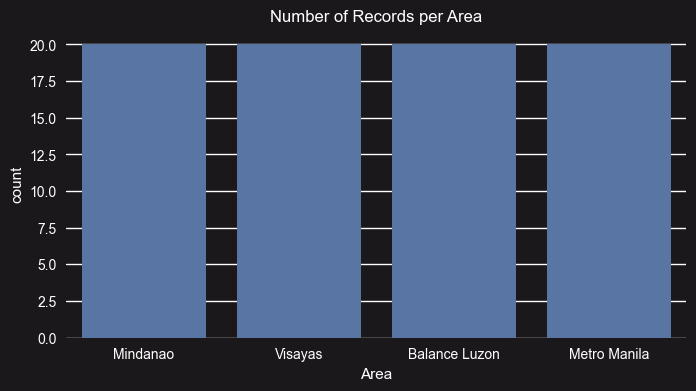

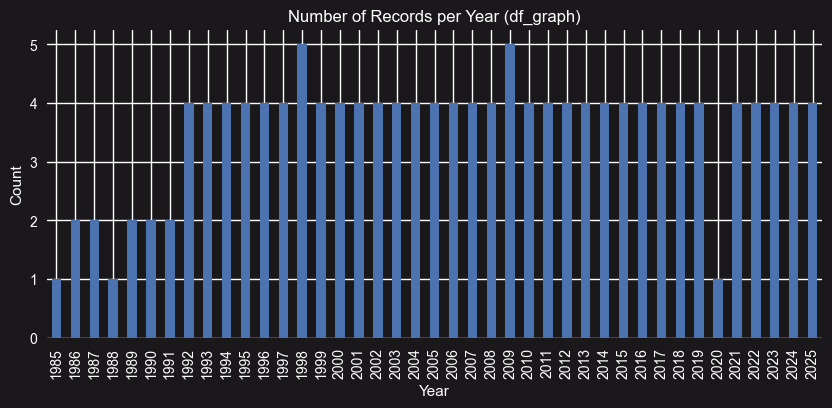

In [19]:
# Category distributions (bar plots)
plt.figure(figsize=(8,4))
sns.countplot(x='Area', data=df_area, order=df_area['Area'].value_counts().index)
plt.title('Number of Records per Area')
plt.show()

plt.figure(figsize=(10,4))
df_graph['Year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Records per Year (df_graph)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [20]:
# Skewness and kurtosis for numeric columns
print('Skewness (df_graph):')
print(df_graph[['Poor', 'Borderline', 'Not Poor']].skew())
print('\nKurtosis (df_graph):')
print(df_graph[['Poor', 'Borderline', 'Not Poor']].kurtosis())

Skewness (df_graph):
Poor          0.257398
Borderline   -0.147349
Not Poor      0.361580
dtype: float64

Kurtosis (df_graph):
Poor         -0.745273
Borderline   -0.141607
Not Poor     -0.086432
dtype: float64


In [21]:
# Check for duplicate rows
print('Duplicate rows in df_graph:', df_graph.duplicated().sum())
print('Duplicate rows in df_area:', df_area.duplicated().sum())

Duplicate rows in df_graph: 0
Duplicate rows in df_area: 0


In [22]:
# Data consistency check: Poor + Borderline + Not Poor should be 100
inconsistent = (df_graph['Poor'] + df_graph['Borderline'] + df_graph['Not Poor'] != 100).sum()
print('Rows in df_graph where Poor + Borderline + Not Poor != 100:', inconsistent)

Rows in df_graph where Poor + Borderline + Not Poor != 100: 0


In [23]:
# Show random samples for qualitative feel
print('Random sample from df_graph:')
display(df_graph.sample(3))
print('Random sample from df_area:')
display(df_area.sample(3))

Random sample from df_graph:


,Year,Month,Poor,Borderline,Not Poor,Total Respondents Percentage,Total Respondents Base,Poor Respondent Count,Borderline Respondent Count,Not Poor Respondent Count,Month Only
95,2012,2012-05-01,51,24,25,100,1200,612,288,300,5
36,1998,1998-02-01,57,27,16,100,1200,684,324,192,2
64,2004,2004-12-01,48,35,17,100,1200,576,420,204,12


Random sample from df_area:


,Sum,Date,Date formatted,Poor,Borderline,Not Poor,Survey Population,Raw Count Poor,Raw Count Borderline,Raw Count Not Poor,Area,Month Only
65,100,1/1/2025,2025-01-01,61,17,22,300,183,51,66,Visayas,1
61,100,12/1/2024,2024-12-01,74,15,11,300,222,45,33,Visayas,12
13,100,12/1/2021,2021-12-01,59,33,8,300,177,99,24,Visayas,12
